# Bank Marketing
This project is a Data-Driven Approach to Predict the Success of Bank Telemarketing. The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y). I would be carrying out an exploratory analysis on the data, performing some feature engineering, filling null values, then building a neural network model.

Check the text file provided to check what each column represents and the literature on the data.




In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#lets grab our data
df = pd.read_csv('bank-additional-full.csv',sep =';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
df.info()
#I usually do this to get an idea of what my dataframe looks like
#seems like theres no null values, but i can see 'unknown' in the default column, lets explore that

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
(df=='unknown').sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

These unknowns could be taken as null values, i will replace them with null values for easier refrencing

In [5]:
df = df.replace('unknown',np.nan)

In [6]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

These null values would need to be filled, but first lets explore the data, it would give an insight on how to fill the null values.

# EDA

In [43]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job2,job3
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,None,None
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,None,None
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,None,None
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,None,None
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,None,None
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,None,None
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,None,None
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,None,None


C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

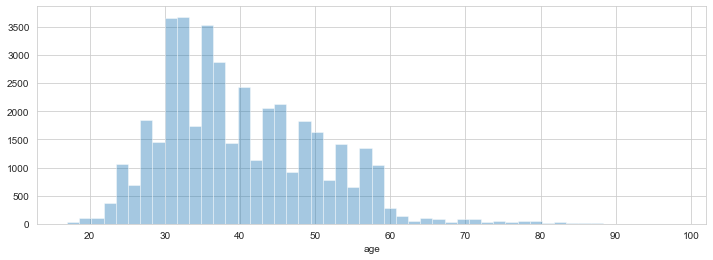

In [7]:

plt.figure(figsize=(12,4))
sns.distplot(df['age'],kde=False)

Majority of the individuals fall between 30years and 40 years

<AxesSubplot:xlabel='y', ylabel='count'>

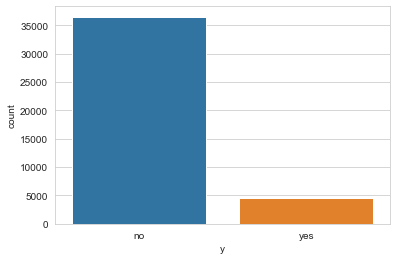

In [44]:
sns.countplot(data = df, x = 'y')

This data is skewed greatly to one side. This could affect the model, making it also skewed

<AxesSubplot:xlabel='job', ylabel='count'>

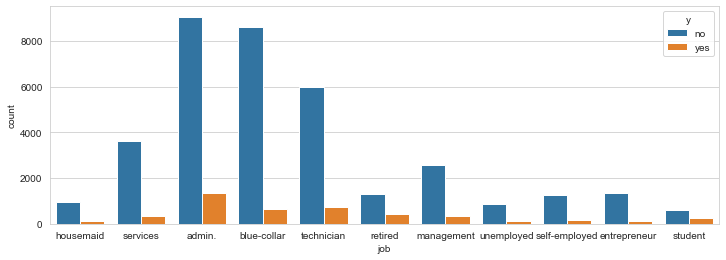

In [46]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x = 'job',hue='y')

<AxesSubplot:xlabel='marital', ylabel='count'>

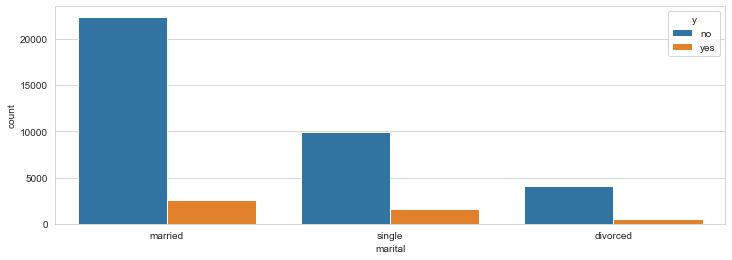

In [47]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x = 'marital',hue='y')

<AxesSubplot:xlabel='marital', ylabel='age'>

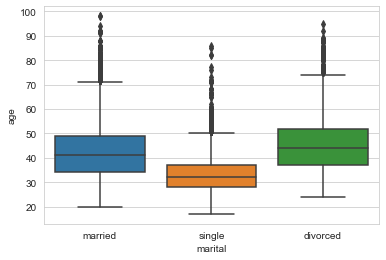

In [48]:
sns.boxplot(x='marital',y='age',data=df)

This makes sense, the married people tend to be older than the single ones, also the divored ones would be the oldest, as they have been married before. This would help in filling the null values in this column

<AxesSubplot:xlabel='education', ylabel='count'>

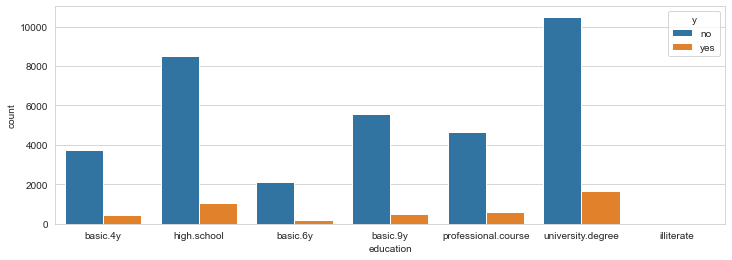

In [49]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x = 'education',hue='y')

<AxesSubplot:xlabel='education', ylabel='age'>

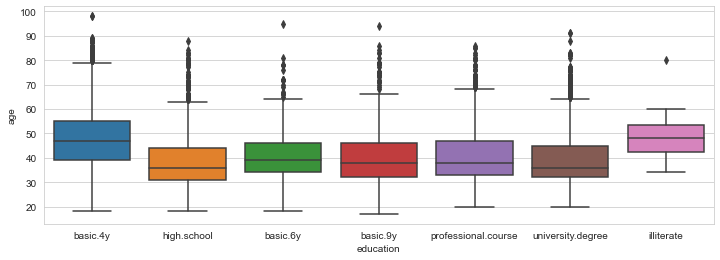

In [52]:
plt.figure(figsize=(12,4))
sns.boxplot(x='education',y='age',data=df)
#the age distribution here is similar across the education and wont help in filling the null values

<AxesSubplot:xlabel='contact', ylabel='count'>

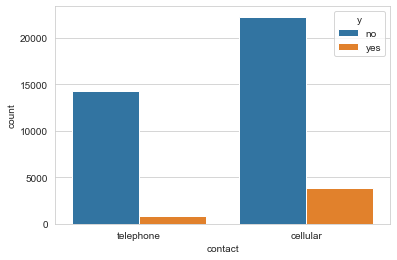

In [58]:
sns.countplot(data = df, x = 'contact',hue='y')

<AxesSubplot:xlabel='poutcome', ylabel='count'>

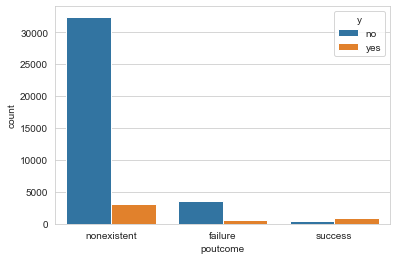

In [59]:
sns.countplot(data = df, x = 'poutcome',hue='y')

<AxesSubplot:xlabel='month', ylabel='count'>

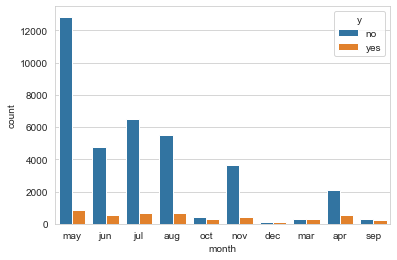

In [176]:
sns.countplot(data = df, x = 'month',hue='y')

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

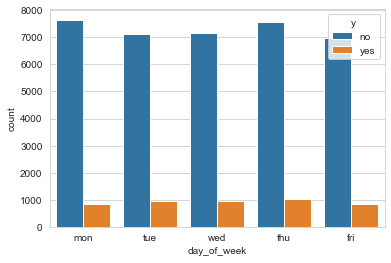

In [179]:
sns.countplot(data = df, x = 'day_of_week',hue='y')

In [60]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Notice those highly correlated columns lets explore those

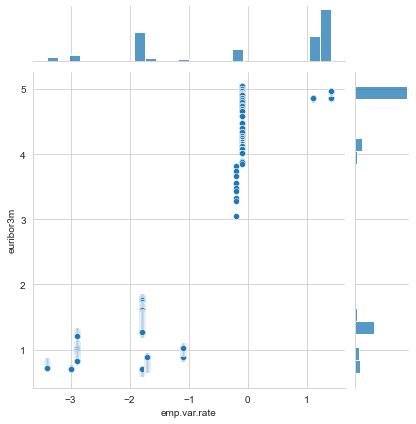

In [63]:
sns.jointplot(x='emp.var.rate',y='euribor3m',data=df,kind='scatter')

I will have to remove one of this columns because two highly correlated features are not good for the model

# Feature engineering
Time to fill in those null values and overall prepare the data for its model

In [79]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [20]:
df.isnull().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
job2              41188
job3              41188
dtype: int64

I will start with the job column

In [66]:
df['job'].value_counts(dropna = False)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
NaN                330
Name: job, dtype: int64

<AxesSubplot:xlabel='job', ylabel='age'>

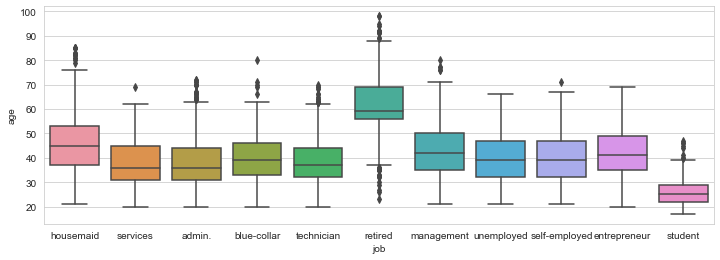

In [68]:
plt.figure(figsize=(12,4))
sns.boxplot(x='job',y='age',data=df)


<AxesSubplot:xlabel='job', ylabel='count'>

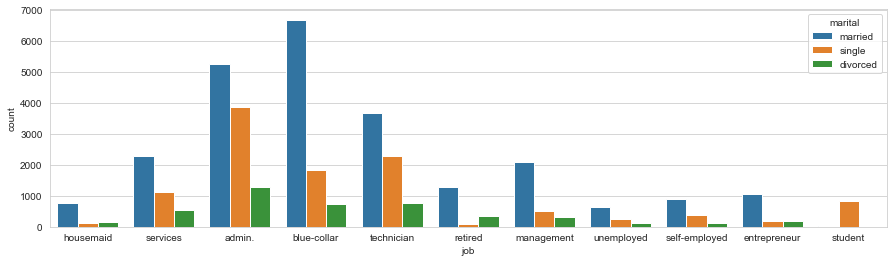

In [69]:
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = 'job',hue='marital')

<AxesSubplot:xlabel='job', ylabel='count'>

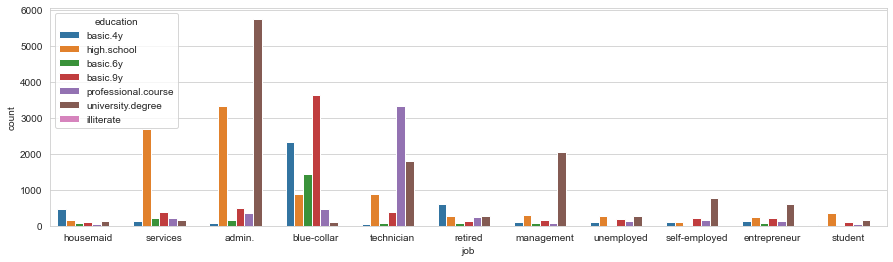

In [78]:
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = 'job',hue='education')

<AxesSubplot:xlabel='job', ylabel='count'>

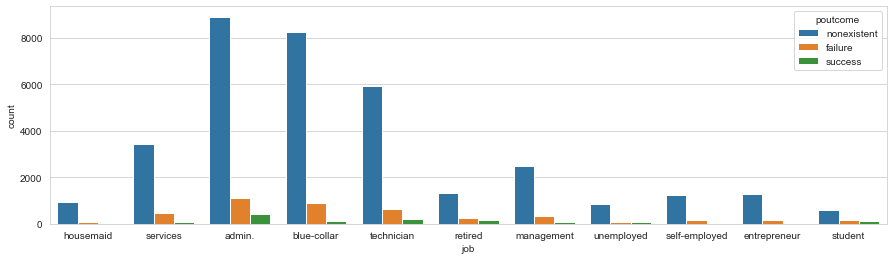

In [80]:
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = 'job',hue='poutcome')

Based on the following relationships job has with the above features, i can make the following assumptions in the function below

In [112]:
def impute_job_1(cols):
    job = cols[1]
    age = cols[0]
    marital = cols[2]
    education = cols[3]
    poutcome = cols[4]
    
    if pd.isnull(job):
        if (age < 26) and (marital == 'single') and (education == 'high.school'or'university.degree'):
            return 'student'
        elif (age > 700) and (marital == 'married'or'divorced') and (poutcome == 'nonexistent'):
            return 'retired'
        elif (marital == 'married') and (education == 'basic.9y'or'basic.4y'): 
            return 'blue-collar'
        elif (marital == 'married')and (education == 'university.degree') and (poutcome == 'nonexistent'):
            return 'management'
        elif (marital == 'married'or'single') and (education == 'high.school'or'university.degree') and (poutcome == 'success'or'nonexistent'):
            return 'admin.'
        else:
            return np.nan
        
    else:
        return job

In [113]:
df['job'] = df[['age','job','marital','education','poutcome']].apply(impute_job_1,axis=1)

In [116]:
df['job'].value_counts(dropna = False)

admin.           10510
blue-collar       9488
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            883
Name: job, dtype: int64

Job null values, solved \
Next lets look at education

In [117]:
df['education'].value_counts(dropna = False)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
NaN                     1731
illiterate                18
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

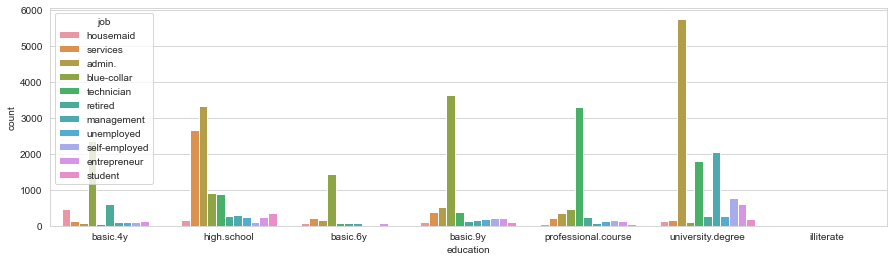

In [118]:
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = 'education',hue='job')

<AxesSubplot:xlabel='education', ylabel='count'>

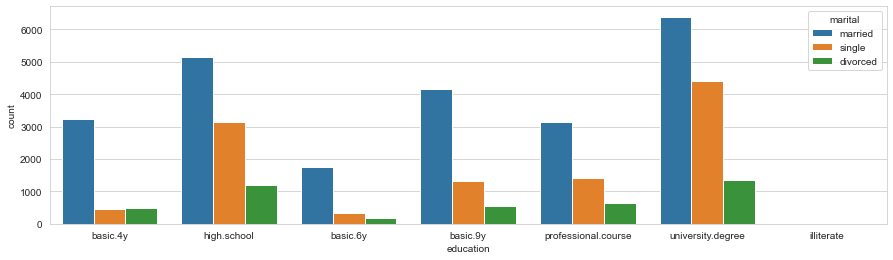

In [119]:
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = 'education',hue='marital')

<AxesSubplot:xlabel='education', ylabel='count'>

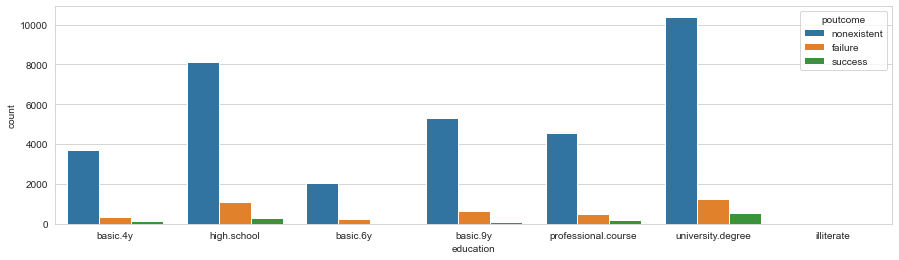

In [120]:
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = 'education',hue='poutcome')

Just like i did earlier, i can make the following assumptions from the relationships above

In [132]:
def impute_education_1(cols):
    job = cols[1]
    marital = cols[2]
    education = cols[0]
    poutcome = cols[3]
    
    if pd.isnull(education):
        if (job == 'admin.')and (marital == 'married'or'single') and (poutcome == 'nonexistent'):
            return 'university.degree'
        elif (job == 'services')and (marital == 'married'or'single') and (poutcome == 'nonexistent'):
            return 'high.school'
        elif (job == 'blue-collar') and(marital == 'married') and (poutcome == 'nonexistent'):
            return 'basic.9y'
        elif (job == 'technician') and (poutcome == 'nonexistent'):
            return 'professional.course'
        elif (job == 'housemaid') and (marital == 'married'):
            return 'basic.4y'
        else:
            return np.nan
        
    else:
        return education

In [133]:
df['education'] = df[['education','job','marital','poutcome']].apply(impute_education_1,axis=1)


In [134]:
df['education'].value_counts(dropna = False)

university.degree      12399
high.school             9652
basic.9y                6429
professional.course     5414
basic.4y                4203
basic.6y                2292
NaN                      781
illiterate                18
Name: education, dtype: int64

Some of the null values have been accounted for, some still remain

In [140]:
df['education'].value_counts(normalize=True,dropna=True)

university.degree      0.306853
high.school            0.238870
basic.9y               0.159106
professional.course    0.133987
basic.4y               0.104017
basic.6y               0.056723
illiterate             0.000445
Name: education, dtype: float64

In [141]:
#I'm filling the null values randomly in the same proportion as the known values
df['education'] = df['education'].fillna(pd.Series(np.random.choice(['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','illiterate'],
                                                                    p=[0.3069,0.2389,0.1591,0.1340,0.1040,0.0567,0.0004],size=len(df))))

In [142]:
df['education'].value_counts(dropna = False)

university.degree      12643
high.school             9829
basic.9y                6572
professional.course     5500
basic.4y                4292
basic.6y                2333
illiterate                19
Name: education, dtype: int64

Education solved \
Lets look at housing

In [143]:
df['housing'].value_counts(dropna = False)

yes    21576
no     18622
NaN      990
Name: housing, dtype: int64

After checking for correlation with other features, i found out the distribution is almost the same across all features. meaning i can't do what i did in the case of other null values. i will distribute yes and no in the ratio of the known values

In [155]:
df['housing'].value_counts(normalize=True,dropna=True)

yes    0.536743
no     0.463257
Name: housing, dtype: float64

In [156]:
df['housing'] = df['housing'].fillna(pd.Series(np.random.choice(['yes','no'],
                                                                    p=[0.54,0.46],size=len(df))))

In [157]:
df['housing'].value_counts(dropna = False)

yes    22068
no     19120
Name: housing, dtype: int64

Now lets look at loan

In [158]:
df['loan'].value_counts(dropna = False)

no     33950
yes     6248
NaN      990
Name: loan, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

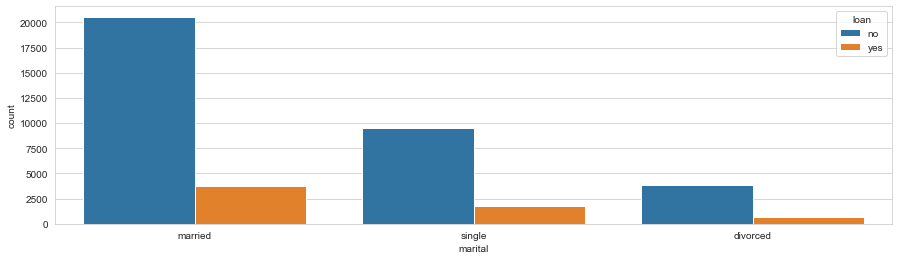

In [161]:
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = 'marital',hue='loan')

The same thing with housing applies here too

In [162]:
df['loan'].value_counts(normalize=True,dropna=True)

no     0.844569
yes    0.155431
Name: loan, dtype: float64

In [163]:
df['loan'] = df['loan'].fillna(pd.Series(np.random.choice(['yes','no'],
                                                                    p=[0.16,0.84],size=len(df))))

In [165]:
df['loan'].value_counts(dropna = False)

no     34785
yes     6403
Name: loan, dtype: int64

Lets check whats left to fill

In [167]:
df.isnull().sum()

age                  0
job                  0
marital             80
education            0
default           8597
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Lets check what the default column is all about and know if it can be dropped, because thats alot of null values

In [170]:
df['default'].value_counts(dropna = False)

no     32588
NaN     8597
yes        3
Name: default, dtype: int64

From the information above, it would be hard going forward with this column, so i will drop the column

In [171]:
df.drop('default',axis = 1, inplace = True)

The last feature with null values(marital) has too few null values and can be dropped

In [172]:
df.dropna(inplace = True)

In [173]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

With this we are done woth filling missing values

# Converting Categorical Features
I'll need to convert categorical features to dummy variables using pandas! Otherwise my machine learning algorithm won't be able to directly take in those features as inputs.

In [174]:
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


From the text file provided, the 'duration' column is highly correlatd with the target column and advised it should be removed

In [175]:
df.drop('duration',axis = 1, inplace = True)

I will replace the 'yes' and 'no' in 'housing','loan' and 'y' to 1 and 0

In [180]:
df['y']=df['y'].replace(['no', 'yes'],[0,1])
df['housing']=df['housing'].replace(['no', 'yes'],[0,1])
df['loan']=df['loan'].replace(['no', 'yes'],[0,1])

lets look at day_of_week again

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

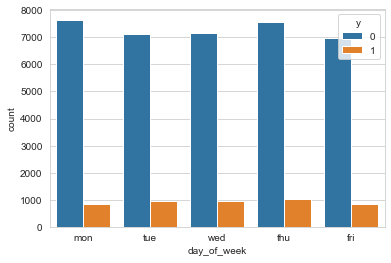

In [181]:
sns.countplot(data = df, x = 'day_of_week',hue='y')

The distribution across the day of week is almost constant and thus it can be dropped

In [182]:
df.drop('day_of_week',axis = 1,inplace = True)

Remember from the EDA above, we saw two columns that were highly correlated, 'emp.var.rate' and 'euribor3m'. i will remove 'euribor3m'

In [183]:
df.drop('euribor3m',axis = 1, inplace = True)

Lets look at pdays. From the text file pdays is the number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

In [186]:
df['pdays'].value_counts()

999    39598
3        439
6        410
4        117
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        27
1         26
15        24
14        20
8         18
0         15
16        10
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

<AxesSubplot:xlabel='pdays', ylabel='count'>

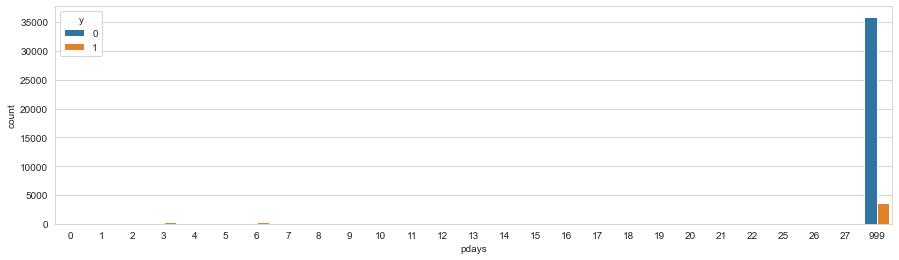

In [190]:
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = 'pdays',hue='y')

Lets view this without 999

<AxesSubplot:xlabel='pdays', ylabel='count'>

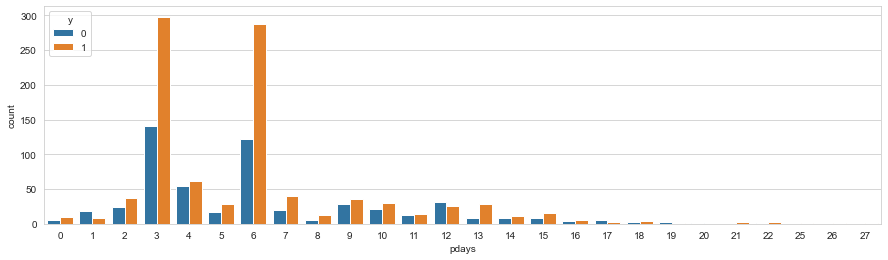

In [191]:
plt.figure(figsize=(15,4))
sns.countplot(data = df[df['pdays']!=999], x = 'pdays',hue='y')

Due to the nature of this feature and how important it is, i am going to convert them to strings and then to dummy variables. but before i do that i will group some of the numbers

In [193]:
df['pdays']=df['pdays'].replace([[18,19,20,21,22,25,26,27]],[17])

<AxesSubplot:xlabel='pdays', ylabel='count'>

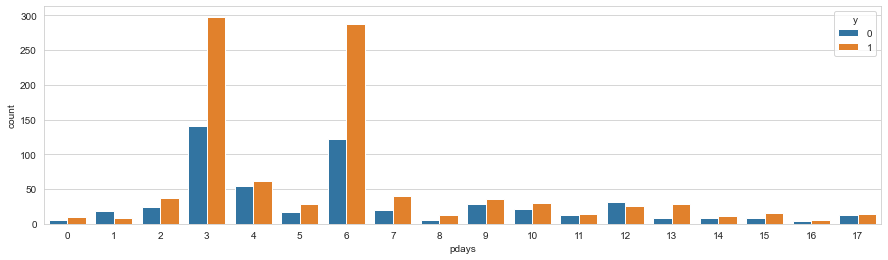

In [194]:
plt.figure(figsize=(15,4))
sns.countplot(data = df[df['pdays']!=999], x = 'pdays',hue='y')

In [198]:
df['pdays'] = df['pdays'].apply(lambda x: str(x))

In [200]:
df['pdays']

0        999
1        999
2        999
3        999
4        999
        ... 
41183    999
41184    999
41185    999
41186    999
41187    999
Name: pdays, Length: 41108, dtype: object

Finally we can convert all object types to dummy variables

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41108 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41108 non-null  int64  
 1   job             41108 non-null  object 
 2   marital         41108 non-null  object 
 3   education       41108 non-null  object 
 4   housing         41108 non-null  int64  
 5   loan            41108 non-null  int64  
 6   contact         41108 non-null  object 
 7   month           41108 non-null  object 
 8   campaign        41108 non-null  int64  
 9   pdays           41108 non-null  object 
 10  previous        41108 non-null  int64  
 11  poutcome        41108 non-null  object 
 12  emp.var.rate    41108 non-null  float64
 13  cons.price.idx  41108 non-null  float64
 14  cons.conf.idx   41108 non-null  float64
 15  nr.employed     41108 non-null  float64
 16  y               41108 non-null  int64  
dtypes: float64(4), int64(6), object

In [202]:
dummies = pd.get_dummies(df[['job', 'marital','education','contact','month','pdays','poutcome']],drop_first=True)
df = df.drop(['job', 'marital','education','contact','month','pdays','poutcome'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [204]:
df

,age,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,...,pdays_3,pdays_4,pdays_5,pdays_6,pdays_7,pdays_8,pdays_9,pdays_999,poutcome_nonexistent,poutcome_success
0,56,0,0,1,0,1.1,93.994,-36.4,5191.0,0,...,0,0,0,0,0,0,0,1,1,0
1,57,0,0,1,0,1.1,93.994,-36.4,5191.0,0,...,0,0,0,0,0,0,0,1,1,0
2,37,1,0,1,0,1.1,93.994,-36.4,5191.0,0,...,0,0,0,0,0,0,0,1,1,0
3,40,0,0,1,0,1.1,93.994,-36.4,5191.0,0,...,0,0,0,0,0,0,0,1,1,0
4,56,0,1,1,0,1.1,93.994,-36.4,5191.0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,1,0,-1.1,94.767,-50.8,4963.6,1,...,0,0,0,0,0,0,0,1,1,0
41184,46,0,0,1,0,-1.1,94.767,-50.8,4963.6,0,...,0,0,0,0,0,0,0,1,1,0
41185,56,1,0,2,0,-1.1,94.767,-50.8,4963.6,0,...,0,0,0,0,0,0,0,1,1,0
41186,44,0,0,1,0,-1.1,94.767,-50.8,4963.6,1,...,0,0,0,0,0,0,0,1,1,0


# Importing train test split

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X = df.drop('y',axis=1).values
Y = df['y'].values

In [214]:
X.shape

(41108, 57)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [216]:
#Scaling the data, this improves the model
from sklearn.preprocessing import MinMaxScaler

In [217]:
scaler = MinMaxScaler()

In [218]:
X_train = scaler.fit_transform(X_train)

In [219]:
X_test = scaler.transform(X_test)

# Building a neural network model

In [220]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [270]:
model = Sequential()

model.add(Dense(57,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(57, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(29, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [222]:
from tensorflow.keras.callbacks import EarlyStopping

In [271]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [272]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size=250,
          validation_data=(X_test, y_test),callbacks=[early_stop] 
          )

Epoch 1/600
132/132 [==============================] - 3s 12ms/step - loss: 0.4193 - val_loss: 0.2952
Epoch 2/600
132/132 [==============================] - 1s 9ms/step - loss: 0.3427 - val_loss: 0.2910
Epoch 3/600
132/132 [==============================] - 1s 7ms/step - loss: 0.3294 - val_loss: 0.2892
Epoch 4/600
132/132 [==============================] - 1s 7ms/step - loss: 0.3247 - val_loss: 0.2901
Epoch 5/600
132/132 [==============================] - 1s 7ms/step - loss: 0.3192 - val_loss: 0.2856
Epoch 6/600
132/132 [==============================] - 1s 7ms/step - loss: 0.3165 - val_loss: 0.2863
Epoch 7/600
132/132 [==============================] - 1s 7ms/step - loss: 0.3128 - val_loss: 0.2879
Epoch 8/600
132/132 [==============================] - 1s 7ms/step - loss: 0.3103 - val_loss: 0.2899
Epoch 9/600
132/132 [==============================] - 1s 7ms/step - loss: 0.3077 - val_loss: 0.2849
Epoch 10/600
132/132 [==============================] - 1s 6ms/step - loss: 0.3064 - val_l

In [273]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

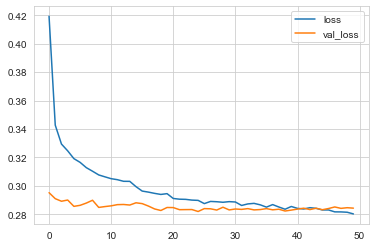

In [274]:
losses[['loss','val_loss']].plot()

# Evaluation

In [243]:
from sklearn.metrics import classification_report,confusion_matrix

In [275]:
predictions =  (model.predict(X_test)>0.4).astype('int32')

257/257 [==============================] - 1s 2ms/step


In [276]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7302
           1       0.57      0.29      0.38       920

    accuracy                           0.90      8222
   macro avg       0.74      0.63      0.66      8222
weighted avg       0.88      0.90      0.88      8222



In [277]:
confusion_matrix(y_test,predictions)

array([[7106,  196],
       [ 657,  263]], dtype=int64)

In as much as the accuracy is 90%, this is not a very good model, beacause it failed in predicting those that subscribed to a bank term deposit properly. This is possibly because of the skewness of the data provided and thus doesnt give enough information on those that subscribed. Could also be because of the way i filled the null values. However its still a good model, just not good enough. Thankyou.